<a href="https://colab.research.google.com/github/gourav10/Author_Identification/blob/main/Author_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authorship Identification

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train_dataset_path = '/content/gdrive/MyDrive/CS6140/Author_Identification/Gungor_2018_VictorianAuthorAttribution_data-train.csv'
test_dataset_path = '/content/gdrive/MyDrive/CS6140/Author_Identification/Gungor_2018_VictorianAuthorAttribution_data.csv'
author_list_path='/content/gdrive/MyDrive/CS6140/Author_Identification/author_list.txt'

In [5]:
import pandas as pd
import pprint

In [6]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_df = pd.read_csv(train_dataset_path, encoding='latin-1')
test_df = pd.read_csv(test_dataset_path, encoding='latin-1')

In [8]:
train_df.head()

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcfbb43f50>]],
      dtype=object)

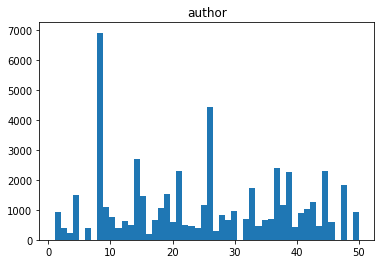

In [9]:
train_df.hist(column='author',grid=False,bins=50,rwidth=1)

In [46]:
def load_author_names():
  f = open(author_list_path, 'r')
  author_list = f.read().split('\n')
  f.close()
  author_catalog = {}
  for i in range(len(author_list)):
    author_catalog[i+1] = author_list[i]
  return author_catalog


pprint.pprint(load_author_names())

{1: 'Arthur Conan Doyle',
 2: 'Charles Darwin',
 3: 'Charles Dickens',
 4: 'Edith Wharton',
 5: 'George Eliot',
 6: 'Horace Greeley',
 7: 'Jack London',
 8: 'James Baldwin',
 9: 'Jane Austen',
 10: 'John Muir',
 11: 'Joseph Conrad',
 12: 'Mark Twain',
 13: 'Nathaniel Hawthorne',
 14: 'Ralph Emerson',
 15: 'Robert Louis Stevenson',
 16: 'Rudyard Kipling',
 17: 'Sinclair Lewis',
 18: 'Theodore Dreiser',
 19: 'Thomas Hardy',
 20: 'Walt Whitman',
 21: 'Washington Irving',
 22: 'William Carleton',
 23: 'Albert Ross',
 24: 'Anne Manning',
 25: 'Arlo Bates',
 26: 'Bret Harte',
 27: 'Catharine Maria Sedgwick',
 28: 'Charles Reade',
 29: 'Edward Eggleston',
 30: 'Fergus Hume',
 31: 'Frances Hodgson Burnett',
 32: 'George Moore',
 33: 'George William Curtis',
 34: 'Helen Mathers',
 35: 'Henry Rider Haggard',
 36: 'Isabella Lucy Bird',
 37: 'Jacob Abbott',
 38: 'James Grant',
 39: 'James Payn',
 40: 'John Kendrick Bangs',
 41: 'John Pendleton Kennedy',
 42: 'John Strange Winter',
 43: 'Lucas Male

In [47]:
def get_author_content_distribution(train_df):
  author_catalog = load_author_names()
  lookup_table = {}
  for i in range(train_df['author'].count()):
    author_id = train_df['author'].iloc[i]
    try:
      if(author_catalog[author_id] in lookup_table.keys()):
        lookup_table[author_catalog[author_id]]+=1
      else:
        lookup_table[author_catalog[author_id]] = 1
    except:
      print("{} not present in Author list".format(author_id))
  return lookup_table

In [50]:
dist_dict = get_author_content_distribution(train_df)
pprint.pprint(dist_dict)

{'Albert Ross': 455,
 'Anne Manning': 380,
 'Arlo Bates': 1159,
 'Arthur Conan Doyle': 912,
 'Bret Harte': 4441,
 'Catharine Maria Sedgwick': 306,
 'Charles Darwin': 382,
 'Charles Dickens': 213,
 'Charles Reade': 823,
 'Edith Wharton': 1483,
 'Edward Eggleston': 645,
 'Fergus Hume': 972,
 'George Moore': 703,
 'George William Curtis': 1742,
 'Helen Mathers': 453,
 'Henry Rider Haggard': 659,
 'Horace Greeley': 407,
 'Isabella Lucy Bird': 693,
 'Jacob Abbott': 2387,
 'James Baldwin': 6914,
 'James Grant': 1163,
 'James Payn': 2266,
 'Jane Austen': 1108,
 'John Kendrick Bangs': 430,
 'John Muir': 755,
 'John Pendleton Kennedy': 911,
 'John Strange Winter': 1022,
 'Joseph Conrad': 383,
 'Lucas Malet': 1266,
 'Marie Corelli': 468,
 'Mark Twain': 627,
 'Nathaniel Hawthorne': 485,
 'Oliver Optic': 2312,
 'Ralph Emerson': 2696,
 'Robert Louis Stevenson': 1460,
 'Rudyard Kipling': 183,
 'Sarah Orne Jewett': 605,
 'Sinclair Lewis': 660,
 'Theodore Dreiser': 1078,
 'Thomas Anstey Guthrie': 1825

In [51]:
print("Training sample number: ", train_df.shape)
print("Test sample number: ", test_df.shape)

Training sample number:  (53678, 2)
Test sample number:  (38809, 1)


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53678 entries, 0 to 53677
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    53678 non-null  object
 1   author  53678 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 838.8+ KB


In [ ]:
# Calculate average word count